# New York City Airbnb Open Data

### Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate

### Imports

In [ ]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import Point

import folium

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import contextily as cx

### Display Imports & Their Versions

In [4]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


### Import Dataset

In [6]:
df = geopandas.read_file("data/AB_NYC_2019.csv")

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,,,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,,,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,,,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,,,6,2


In [7]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895
unique,48895,47906,37457,11453,5,221,19048,14718,3,674,109,394,1765,948,47,366
top,2539,Hillside Hotel,219517861,Michael,Manhattan,Williamsburg,40.71813,-73.95677,Entire home/apt,100,1,0,,,1,0
freq,1,18,327,417,21661,3920,18,18,25409,2051,12720,10052,10052,10052,32303,17533


### Return Information About Unqiue Values in Select Features

In [8]:
cols_to_check = [
    "id",
    "name",
    "host_id",
    "host_name",
    "neighbourhood_group",
    "neighbourhood",
    "latitude",
    "longitude",
    "room_type",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "last_review",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

for col in cols_to_check:
    u_vals = np.sort(df[col].unique())
    if len(u_vals) < 250:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

id (48895)

name (47906)

host_id (37457)

host_name (11453)

neighbourhood_group (5)
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']

neighbourhood (221)
['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chinatown' 'City Island'
 'Civic Center' 'Claremont Village' 'Clason Point' 'Clifton'
 'Clinton Hill' 'Co-op City' 'Cobble Hill' 'College Point' 'Columbia St'
 'Concord' 'Concourse' 'Concourse Village' 'Coney Island' 'Corona'
 'Crown Heights' 'Cypress Hills' 'DUMBO' 'Ditmars Steinway' 'Dongan Hills'
 'Douglaston' 'Downtown

### Remove Select Features 

In [ ]:
cols_to_remove = [
    "id"
]

df.drop(columns=cols_to_remove, inplace=True)

### Rename Features as Needed

In [10]:
cols_to_rename = {
    "neighbourhood_group": "borough",
    "price": "price_per_night",
    "minimum_nights": "min_num_of_nights",
    "number_of_reviews": "num_of_reviews",
    "calculated_host_listings_count": "calc_host_listings_count"
}

df.rename(columns=cols_to_rename, inplace=True)

df.head()

,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price_per_night,min_num_of_nights,num_of_reviews,last_review,reviews_per_month,calc_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Convert Pandas DataFrame to GeoPandas GeoDataFrame & Create 'geometry' Feature

In [11]:
gdf = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

gdf.drop(columns=["latitude", "longitude"], inplace=True)

gdf.head()

,name,host_id,host_name,borough,neighbourhood,room_type,price_per_night,min_num_of_nights,num_of_reviews,last_review,reviews_per_month,calc_host_listings_count,availability_365,geometry
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,,,1,365,POINT (-73.9419 40.80902)
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


## Data Visualizations

### Non-Interactive Data Visualization

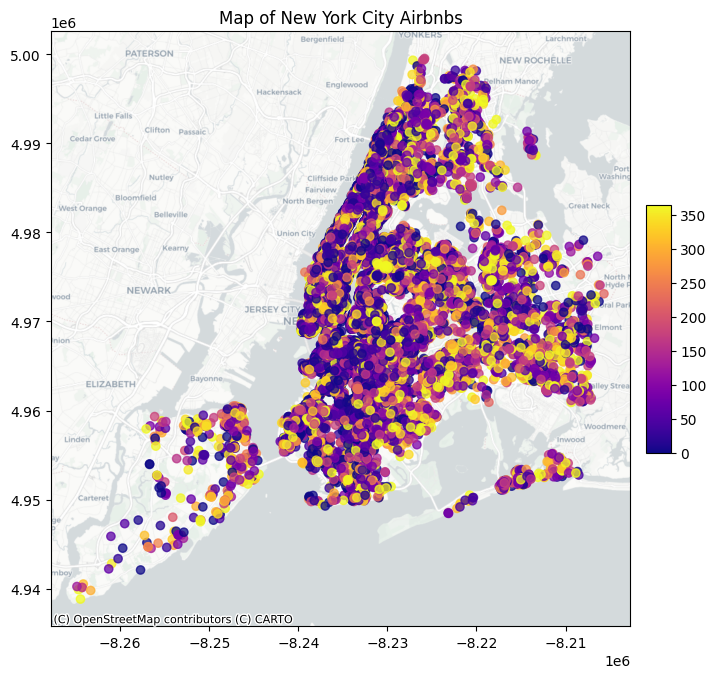

In [ ]:
gdf_plot = gdf.to_crs(epsg=3857)

gdf_plot['availability_365'] = gdf_plot['availability_365'].astype(float)

norm = mcolors.Normalize(vmin=np.min(gdf_plot['availability_365']), vmax=np.max(gdf_plot['availability_365']))

fig, ax = plt.subplots(figsize=(8, 24))
gdf_plot.plot(
    column='availability_365', 
    ax=ax, 
    alpha=0.75, 
    cmap='plasma',
    norm=norm,
    legend=True,
    legend_kwds={
        "shrink": 0.5,
        "aspect": 10,
        "pad": 0.025,
        "fraction": 0.04,
        "orientation": "vertical"
    }
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of New York City Airbnbs")

plt.show()

### Interactive Data Visualization

In [ ]:
gdf.explore(
    m = folium.Map(
        location=[40.75, -73.9], 
        tiles="OpenStreetMap", # "CartoDB Voyager", OpenStreetMap
        zoom_start=10,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 0.50,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.20
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'red',
        'weight': 5,
        'opacity': 1,
        'fill': True,
        'fillColor': '#FF474C',
        'fillOpacity': 0.75
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            "Listing Name",
            "Host ID",
            "Host Name",
            "Borough",
            "Neighbourhood",
            "Room Type",
            "Price Per Night",
            "Minimum # of Nights",
            "Num of Reviews",
            "Last Review",
            "Reviews Per Month",
            "Calculated Host Listings Count",
            "Availability (Out of 365)"
        ]
    }
)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

## Time For Fun With Functions

### Dissolve by Borough

In [18]:
gdf.dissolve(by='borough', sort=True)

,geometry,name,host_id,host_name,neighbourhood,room_type,price_per_night,min_num_of_nights,num_of_reviews,last_review,reviews_per_month,calc_host_listings_count,availability_365
borough,,,,,,,,,,,,,
Bronx,"MULTIPOINT (-73.9319 40.80828, -73.93184 40.83...",Room with a View,190409,Waundell,Highbridge,Private room,40,1,219,2019-07-04,2.04,3,353
Brooklyn,"MULTIPOINT (-74.03942 40.62053, -74.03788 40.6...",Clean & quiet apt home by the park,2787,John,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
Manhattan,"MULTIPOINT (-74.01851 40.70515, -74.01837 40.7...",Skylit Midtown Castle,2845,Jennifer,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
Queens,"MULTIPOINT (-73.95927 40.74029, -73.95804 40.7...","1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Long Island City,Private room,130,3,248,2019-07-01,2.25,1,215
Staten Island,"MULTIPOINT (-74.24442 40.50943, -74.24285 40.5...",New York room with a view,185978,Newyorkroomwithaview,St. George,Private room,70,2,166,2019-06-13,1.66,1,312


### Dissolve by Room Type

In [19]:
gdf.dissolve(by='room_type', sort=True, aggfunc='mean', numeric_only=True)

,geometry
room_type,
Entire home/apt,"MULTIPOINT (-74.24442 40.50943, -74.23986 40.5..."
Private room,"MULTIPOINT (-74.24285 40.50708, -74.24084 40.4..."
Shared room,"MULTIPOINT (-74.12559 40.63136, -74.09663 40.5..."


### Append Column With Geometry Type for Each Record

In [ ]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

### Determine Point's Distance From Harvard

In [22]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [ ]:
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point)

gdf_projected.head()

,name,host_id,host_name,borough,neighbourhood,room_type,price_per_night,min_num_of_nights,num_of_reviews,last_review,reviews_per_month,calc_host_listings_count,availability_365,geometry,dist_from_harvard,hausdorff_dist_from_harvard,frechet_dist_from_harvard
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (586884.782 4500133.886),4.538209e+06,4.538209e+06,4.538209e+06
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (585784.635 4511903.79),4.549738e+06,4.549738e+06,4.549738e+06
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,,,1,365,POINT (589244.942 4518095.41),4.556325e+06,4.556325e+06,4.556325e+06
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (587901.506 4504325.79),4.542497e+06,4.542497e+06,4.542497e+06
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (589082.713 4516926.585),4.555145e+06,4.555145e+06,4.555145e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,,,2,9,POINT (588739.244 4503601.898),4.541888e+06,4.541888e+06,4.541888e+06
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,,,2,36,POINT (590125.923 4506206.535),4.544650e+06,4.544650e+06,4.544650e+06
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,,,1,27,POINT (588666.291 4518724.619),4.556874e+06,4.556874e+06,4.556874e+06
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,,,6,2,POINT (585159.214 4512328.45),4.550079e+06,4.550079e+06,4.550079e+06


### Retrieve Coordinates

In [24]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
              x         y   z
0     -73.97237  40.64749 NaN
1     -73.98377  40.75362 NaN
2     -73.94190  40.80902 NaN
3     -73.95976  40.68514 NaN
4     -73.94399  40.79851 NaN
...         ...       ...  ..
48890 -73.94995  40.67853 NaN
48891 -73.93317  40.70184 NaN
48892 -73.94867  40.81475 NaN
48893 -73.99112  40.75751 NaN
48894 -73.98933  40.76404 NaN

[48895 rows x 3 columns]

GDF Count Coordinates:
0        1
1        1
2        1
3        1
4        1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Length: 48895, dtype: int32

GDF Count Geometries:
0        1
1        1
2        1
3        1
4        1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Length: 48895, dtype: int32


In [25]:
gdf.count_coordinates().mean()

1.0

In [26]:
gdf.count_geometries().mean()

1.0

### Some Basic Functions

In [27]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    48895
dtype: int64

is_valid:
True    48895
dtype: int64

is_valid_reason:
Valid Geometry    48895
dtype: int64

has_z:
False    48895
dtype: int64



### Some More Functions

In [28]:
gdf.envelope

0        POINT (-73.97237 40.64749)
1        POINT (-73.98377 40.75362)
2         POINT (-73.9419 40.80902)
3        POINT (-73.95976 40.68514)
4        POINT (-73.94399 40.79851)
                    ...            
48890    POINT (-73.94995 40.67853)
48891    POINT (-73.93317 40.70184)
48892    POINT (-73.94867 40.81475)
48893    POINT (-73.99112 40.75751)
48894    POINT (-73.98933 40.76404)
Length: 48895, dtype: geometry

In [29]:
gdf.extract_unique_points()

0        MULTIPOINT (-73.97237 40.64749)
1        MULTIPOINT (-73.98377 40.75362)
2         MULTIPOINT (-73.9419 40.80902)
3        MULTIPOINT (-73.95976 40.68514)
4        MULTIPOINT (-73.94399 40.79851)
                      ...               
48890    MULTIPOINT (-73.94995 40.67853)
48891    MULTIPOINT (-73.93317 40.70184)
48892    MULTIPOINT (-73.94867 40.81475)
48893    MULTIPOINT (-73.99112 40.75751)
48894    MULTIPOINT (-73.98933 40.76404)
Length: 48895, dtype: geometry

In [30]:
gdf.force_2d()

0        POINT (-73.97237 40.64749)
1        POINT (-73.98377 40.75362)
2         POINT (-73.9419 40.80902)
3        POINT (-73.95976 40.68514)
4        POINT (-73.94399 40.79851)
                    ...            
48890    POINT (-73.94995 40.67853)
48891    POINT (-73.93317 40.70184)
48892    POINT (-73.94867 40.81475)
48893    POINT (-73.99112 40.75751)
48894    POINT (-73.98933 40.76404)
Length: 48895, dtype: geometry

In [31]:
gdf.minimum_bounding_circle()

0        POINT (-73.97237 40.64749)
1        POINT (-73.98377 40.75362)
2         POINT (-73.9419 40.80902)
3        POINT (-73.95976 40.68514)
4        POINT (-73.94399 40.79851)
                    ...            
48890    POINT (-73.94995 40.67853)
48891    POINT (-73.93317 40.70184)
48892    POINT (-73.94867 40.81475)
48893    POINT (-73.99112 40.75751)
48894    POINT (-73.98933 40.76404)
Length: 48895, dtype: geometry

In [32]:
gdf.remove_repeated_points()

0        POINT (-73.97237 40.64749)
1        POINT (-73.98377 40.75362)
2         POINT (-73.9419 40.80902)
3        POINT (-73.95976 40.68514)
4        POINT (-73.94399 40.79851)
                    ...            
48890    POINT (-73.94995 40.67853)
48891    POINT (-73.93317 40.70184)
48892    POINT (-73.94867 40.81475)
48893    POINT (-73.99112 40.75751)
48894    POINT (-73.98933 40.76404)
Length: 48895, dtype: geometry

### Transform Markers/Points

In [33]:
gdf['geometry'].transform(lambda x: x + [1, 2])

0        POINT (-72.97237 42.64749)
1        POINT (-72.98377 42.75362)
2         POINT (-72.9419 42.80902)
3        POINT (-72.95976 42.68514)
4        POINT (-72.94399 42.79851)
                    ...            
48890    POINT (-72.94995 42.67853)
48891    POINT (-72.93317 42.70184)
48892    POINT (-72.94867 42.81475)
48893    POINT (-72.99112 42.75751)
48894    POINT (-72.98933 42.76404)
Length: 48895, dtype: geometry

### Interface

In [ ]:
gdf.__geo_interface__

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

In [ ]:
for feature in gdf.iterfeatures():
    print(feature)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

# Save Cleaned Dataset to File

In [36]:
new_file_path = "data/cleaned_dataset.geojson"

gdf.to_file(
    new_file_path, 
    driver="GeoJSON"
    )

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/